 # 2. Setting up the data

In [1]:
import numpy as np
import matplotlib.pyplot as pt
import mltools as ml
import random

random.seed(0)
X = np.genfromtxt("data/X_train.txt")
Y = np.genfromtxt("data/Y_train.txt")

X, Y = ml.shuffleData(X, Y)


 ## 2.1 Print the minimum, maximum, mean, and the variance of all of the features.

In [2]:

minimum = [
    min(X[:, feature])
    for feature in range(X.shape[1])
]

maximum = [
    max(X[:, feature])
    for feature in range(X.shape[1])
]

mean = [
    np.mean(X[:, feature])
    for feature in range(X.shape[1])
]

variance = [
    np.var(X[:, feature])
    for feature in range(X.shape[1])
]

print("Minimum of the featurs: \n{}\n".format(minimum))
print("Maximum of the featurs: \n{}\n".format(maximum))
print("Mean of the featurs: \n{}\n".format(mean))
print("Variance of the featurs: \n{}\n".format(variance))


Minimum of the featurs: 
[193.0, 190.0, 214.97, 205.42, 10.0, 0.0, 0.0, 0.0, 0.68146, 0.0, 0.0, 0.0, 1.0074, -999.9]

Maximum of the featurs: 
[253.0, 250.5, 252.5, 252.5, 17130.0, 12338.0, 9238.0, 35.796, 19.899, 11.368, 21.466, 14.745, 278.71, 782.5]

Mean of the featurs: 
[241.7972204, 228.22826005000007, 241.79629755, 233.64929865000002, 2867.97959, 884.073295, 173.553355, 3.04719571745, 6.351967218049999, 1.92523231921, 4.2937934887, 2.8094717789999994, 10.3679146455, 7.8733445]

Variance of the featurs: 
[82.69456190782383, 90.95739454607401, 35.72557959436399, 95.26085391860819, 10619418.044443432, 3257029.8456128435, 740656.1336232441, 7.422442772290731, 6.332299131939854, 4.284487034670786, 4.046840868867377, 1.9821830277466965, 166.67925177399366, 1410.79679273432]



 # 2.2 Split the dataset, and rescale each into training and validation.

In [3]:
Xtr, Xva, Ytr, Yva = ml.splitData(X, Y)
Xt, Yt = Xtr[:5000], Ytr[:5000]  # subsample for efficiency (you can go higher)
XtS, params = ml.rescale(Xt)  # Normalize the features
XvS, _ = ml.rescale(Xva, params)  # Normalize the features

minimum = [
    min(XtS[:, feature])
    for feature in range(XtS.shape[1])
]

maximum = [
    max(XtS[:, feature])
    for feature in range(XtS.shape[1])
]

mean = [
    np.mean(XtS[:, feature])
    for feature in range(XtS.shape[1])
]

variance = [
    np.var(XtS[:, feature])
    for feature in range(XtS.shape[1])
]

print("Minimum of the featurs: \n{}\n".format(minimum))
print("Maximum of the featurs: \n{}\n".format(maximum))
print("Mean of the featurs: \n{}\n".format(mean))
print("Variance of the featurs: \n{}\n".format(variance))


Minimum of the featurs: 
[-5.077115407043245, -4.089845800502515, -4.522141152449949, -2.9190402562630764, -0.8638950971668569, -0.48369608840868406, -0.19596529660814596, -1.1310751887585495, -1.9844393103846658, -0.9300123230349963, -2.1762866861845973, -2.00362357654661, -0.7564309749550104, -26.843406161933267]

Maximum of the featurs: 
[1.219983613968418, 1.7081774342764569, 1.6731483057441807, 1.8419056220904828, 4.386010812620294, 6.501875584521141, 11.612730659456139, 8.56749743356835, 4.763551494747096, 4.632622320223143, 6.482616980472011, 5.845184126624507, 15.559371529596728, 19.77483470817384]

Mean of the featurs: 
[-1.1357315088389442e-14, 1.3180567748349858e-15, -2.1611867850879206e-14, -6.508855676656821e-14, 1.7053025658242403e-17, 8.526512829121201e-18, 1.8474111129762604e-17, 7.332801033044234e-16, -3.9534597817691975e-15, -8.540723683836404e-16, -8.427036846114788e-16, -1.0007994433181011e-15, 1.0615508472255897e-15, 1.7621459846850484e-16]

Variance of the featurs

 # 3. Linear Classifiers

In [4]:
learner = ml.linearC.linearClassify()
learner.train(XtS, Yt, reg=0.0, initStep=0.5, stopTol=1e-6, stopIter=100)
learner.auc(XtS, Yt)  # train AUC


0.6602730107947675

 ## 3.1 Regularization

/Users/pranav/School/ml/hw4/mltools/linearC.py:122: RuntimeWarning: overflow encountered in exp
  sigx  = np.exp(respi) / (1.0+np.exp(respi))
/Users/pranav/School/ml/hw4/mltools/linearC.py:122: RuntimeWarning: invalid value encountered in true_divide
  sigx  = np.exp(respi) / (1.0+np.exp(respi))


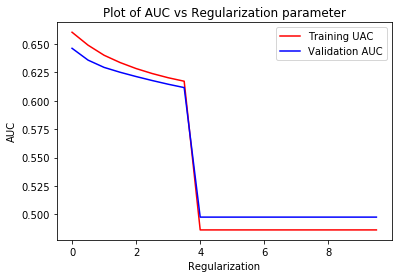

In [5]:

reg = np.arange(0.0, 10.0, 0.5)
auc_val, auc_tr = [], []

for r in reg:
    learner.train(XtS, Yt, reg=r, initStep=0.5, stopTol=1e-6, stopIter=100)
    auc_tr.append(learner.auc(XtS, Yt))
    auc_val.append(learner.auc(XvS, Yva))

pt.plot(reg, auc_tr, "r", label="Training UAC")
pt.plot(reg, auc_val, "b", label="Validation AUC")
pt.xlabel("Regularization")
pt.ylabel("AUC")
pt.legend()
pt.title("Plot of AUC vs Regularization parameter")
pt.show()


 ## 3.2 Adding a 2nd degree polynomial

 Total number of features before = 14.

 The new features will consist of all these $14$ old features.

 Additionally, we will now have all combinations of these features in our second degree polynomial as well.

 Hence, $+^{14}C_2=91$ features.

 Finally, we also have $+14$ new features where each feature is a square of the corresponding old feature.

 Total new features = $14+91+14$
 $=119 features$

 ## 3.3 AUC performance with second degree polynomial.

/Users/pranav/School/ml/hw4/mltools/base.py:96: RuntimeWarning: divide by zero encountered in log
  return - np.mean( np.log( P[ np.arange(M), Y ] ) ) # evaluate
/Users/pranav/School/ml/hw4/mltools/linearC.py:134: RuntimeWarning: invalid value encountered in double_scalars
  done = (it > stopIter) or ( (it>1) and (abs(Jsur[-1]-Jsur[-2])<stopTol) )


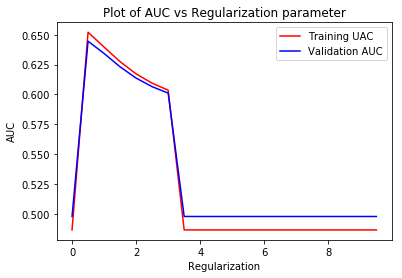

In [6]:
XtP = ml.transforms.fpoly(Xt, 2, bias=False)
XvP = ml.transforms.fpoly(Xva, 2, bias=False)
XtPS, params = ml.rescale(XtP)
XvPS, _ = ml.rescale(XvP, params)

auc_val, auc_tr = [], []

for r in reg:
    learner = ml.linearC.linearClassify()
    learner.train(XtPS, Yt, reg=r, initStep=0.5, stopTol=1e-6, stopIter=100)
    auc_tr.append(learner.auc(XtPS, Yt))
    auc_val.append(learner.auc(XvPS, Yva))

pt.plot(reg, auc_tr, "r", label="Training UAC")
pt.plot(reg, auc_val, "b", label="Validation AUC")
pt.xlabel("Regularization")
pt.ylabel("AUC")
pt.legend()
pt.title("Plot of AUC vs Regularization parameter")
pt.show()


 # 4. Nearest Neighbors

In [7]:
learner = ml.knn.knnClassify()
learner.train(XtS, Yt, K=1, alpha=0.0)
learner.auc(XtS, Yt)  # train AUC


0.992002018529519

 ## 4.1 Plot of the training and validation performance for an appropriately wide range of K, with α = 0.

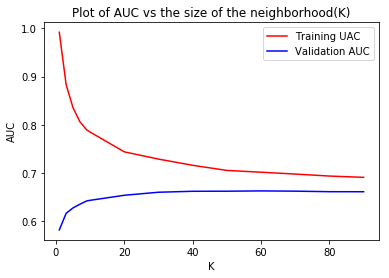

In [8]:
K = list(range(1, 10, 2)) + list(range(10, 100, 10))
auc_val, auc_tr = [], []

for k in K:
    learner = ml.knn.knnClassify()
    learner.train(XtS, Yt, K=int(k), alpha=0.0)
    auc_tr.append(learner.auc(XtS, Yt))
    auc_val.append(learner.auc(XvS, Yva))

pt.plot(K, auc_tr, "r", label="Training UAC")
pt.plot(K, auc_val, "b", label="Validation AUC")
pt.xlabel("K")
pt.ylabel("AUC")
pt.legend()
pt.title("Plot of AUC vs the size of the neighborhood(K)")
pt.show()


 ## 4.2 Unscaled/original data

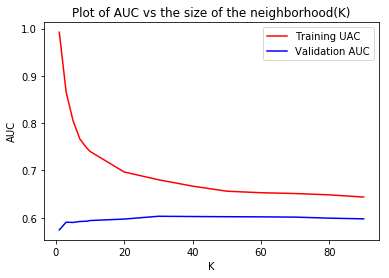

In [9]:
K = list(range(1, 10, 2)) + list(range(10, 100, 10))
auc_val, auc_tr = [], []

for k in K:
    learner = ml.knn.knnClassify()
    learner.train(Xt, Yt, K=k, alpha=0.0)
    auc_tr.append(learner.auc(Xt, Yt))
    auc_val.append(learner.auc(Xva, Yva))

pt.plot(K, auc_tr, "r", label="Training UAC")
pt.plot(K, auc_val, "b", label="Validation AUC")
pt.xlabel("K")
pt.ylabel("AUC")
pt.legend()
pt.title("Plot of AUC vs the size of the neighborhood(K)")
pt.show()


 ## 4.3 Select both the value of K and α

In [10]:
K = range(1, 50, 5)
A = range(0, 5, 1)
tr_auc = np.zeros((len(K), len(A)))
va_auc = np.zeros((len(K), len(A)))

for i, k in enumerate(K):
    for j, a in enumerate(A):
        learner = ml.knn.knnClassify()
        learner.train(Xt, Yt, K=k, alpha=a)
        tr_auc[i][j] = learner.auc(Xt, Yt)
        va_auc[i][j] = learner.auc(Xva, Yva)



/Users/pranav/School/ml/hw4/mltools/knn.py:103: RuntimeWarning: invalid value encountered in true_divide
  prob[i,:] = count / count.sum()    # save (soft) results


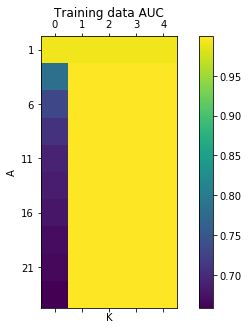

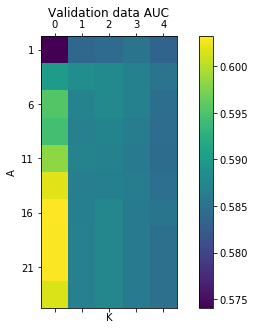

In [11]:
f, ax = pt.subplots(1, 1, figsize=(8, 5))
cax = ax.matshow(tr_auc, interpolation='nearest')
f.colorbar(cax)
ax.set_xticklabels(['']+list(A))
ax.set_yticklabels(['']+list(K))
pt.ylabel("A")
pt.xlabel("K")
pt.title("Training data AUC")
pt.show()

f, ax = pt.subplots(1, 1, figsize=(8, 5))
cax = ax.matshow(va_auc, interpolation='nearest')
f.colorbar(cax)
ax.set_xticklabels(['']+list(A))
ax.set_yticklabels(['']+list(K))
pt.ylabel("A")
pt.xlabel("K")
pt.title("Validation data AUC")
pt.show()

Looking at the plots above K=1 and A=4 looks like optimal values.

 # 5. Decision Trees
 ## 5.1 Vary maxDepth to a range of your choosing, and plot the training and validation

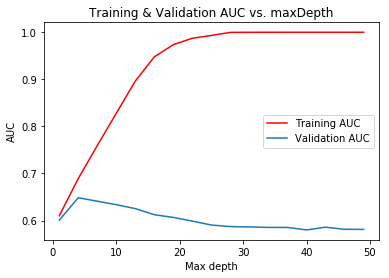

In [12]:
max_depths = list(range(1, 50, 3))
tr_auc, va_auc = [], []

for max_depth in max_depths:
    learner = ml.dtree.treeClassify(
        XtS, Yt, minParent=2, minLeaf=1, maxDepth=max_depth
    )
    tr_auc.append(learner.auc(XtS, Yt))
    va_auc.append(learner.auc(XvS, Yva))

pt.plot(max_depths, tr_auc, "r", label="Training AUC")
pt.plot(max_depths, va_auc, label="Validation AUC")
pt.xlabel("Max depth")
pt.ylabel("AUC")
pt.title("Training & Validation AUC vs. maxDepth")
pt.legend()
pt.show()


 ## 5.2 Plot the number of nodes in the tree as maxDepth is varied.

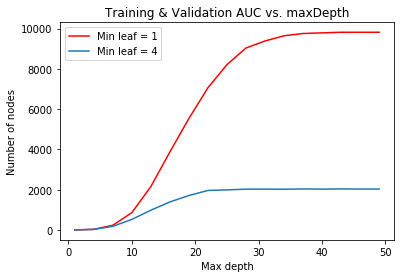

In [13]:
l1, l2 = [], []

for max_depth in max_depths:
    learner1 = ml.dtree.treeClassify(
        XtS, Yt, minParent=2, minLeaf=1, maxDepth=max_depth
    )
    learner2 = ml.dtree.treeClassify(
        XtS, Yt, minParent=2, minLeaf=4, maxDepth=max_depth
    )
    l1.append(learner1.sz)
    l2.append(learner2.sz)

pt.plot(max_depths, l1, "r", label="Min leaf = 1")
pt.plot(max_depths, l2, label="Min leaf = 4")
pt.xlabel("Max depth")
pt.ylabel("Number of nodes")
pt.title("Training & Validation AUC vs. maxDepth")
pt.legend()
pt.show()


 ## 5.3 Recommend a choice for minParent and minLeaf

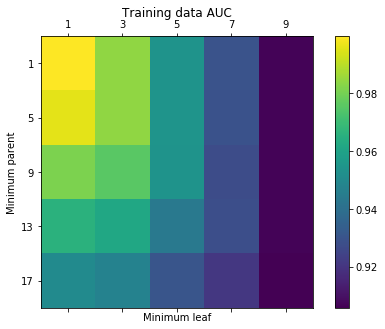

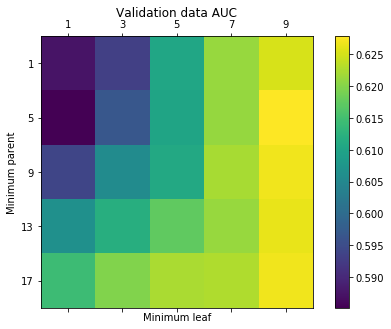

In [14]:
min_parents = range(1, 20, 4)
min_leaves = range(1, 10, 2)
tr_auc = np.zeros((len(min_parents), len(min_leaves)))
va_auc = np.zeros((len(min_parents), len(min_leaves)))

for i,  min_parent in enumerate(min_parents):
    for j, min_leaf in enumerate(min_leaves):
        learner = ml.dtree.treeClassify(
            XtS, Yt,
            minParent=min_parent, minLeaf=min_leaf, maxDepth=30
        )
        tr_auc[i][j] = learner.auc(XtS, Yt)
        va_auc[i][j] = learner.auc(XvS, Yva)

f, ax = pt.subplots(1, 1, figsize=(8, 5))
cax = ax.matshow(tr_auc, interpolation='nearest')
f.colorbar(cax)
ax.set_xticklabels(['']+list(min_leaves))
ax.set_yticklabels(['']+list(min_parents))
pt.ylabel("Minimum parent")
pt.xlabel("Minimum leaf")
pt.title("Training data AUC")
pt.show()

f, ax = pt.subplots(1, 1, figsize=(8, 5))
cax = ax.matshow(va_auc, interpolation='nearest')
f.colorbar(cax)
ax.set_xticklabels(['']+list(min_leaves))
ax.set_yticklabels(['']+list(min_parents))
pt.ylabel("Minimum parent")
pt.xlabel("Minimum leaf")
pt.title("Validation data AUC")
pt.show()


 I would recommend Minimum parent as 1 and Minimum leaf as 7.

 # 6. Neural Networks
 ## 6.1 Vary the number of hidden layers and the nodes in each layer

it 1 : Jsur = 0.4250057207838684, J01 = 0.3296
it 2 : Jsur = 0.4235300506762318, J01 = 0.3252
it 4 : Jsur = 0.42043357014266375, J01 = 0.3232
it 8 : Jsur = 0.4155975725277318, J01 = 0.316
it 16 : Jsur = 0.4120429554714452, J01 = 0.3118
it 32 : Jsur = 0.4099953006812022, J01 = 0.311
it 64 : Jsur = 0.4099099283366171, J01 = 0.3108
it 128 : Jsur = 0.40915837285817264, J01 = 0.3118
it 256 : Jsur = 0.40557397635352466, J01 = 0.3084
it 1 : Jsur = 0.427242663323677, J01 = 0.3306
it 2 : Jsur = 0.4252191839360672, J01 = 0.3294
it 4 : Jsur = 0.42206261956867075, J01 = 0.3254
it 8 : Jsur = 0.4172652735348476, J01 = 0.318
it 16 : Jsur = 0.4126520309544064, J01 = 0.3154
it 32 : Jsur = 0.4099101746059325, J01 = 0.3132
it 64 : Jsur = 0.4082884890365469, J01 = 0.3092
it 128 : Jsur = 0.40740768550254897, J01 = 0.3062
it 256 : Jsur = 0.4065420483502329, J01 = 0.3064
it 1 : Jsur = 0.42660464609267384, J01 = 0.3306
it 2 : Jsur = 0.4243151569940635, J01 = 0.327
it 4 : Jsur = 0.42154694550083566, J01 = 0.32

it 2 : Jsur = 0.4241799795763214, J01 = 0.3278
it 4 : Jsur = 0.4217350068117772, J01 = 0.3258
it 8 : Jsur = 0.418146424326517, J01 = 0.3218
it 16 : Jsur = 0.412799774411854, J01 = 0.316
it 32 : Jsur = 0.4097213789111488, J01 = 0.3124
it 64 : Jsur = 0.40764727433829334, J01 = 0.3098
it 128 : Jsur = 0.40548537438306936, J01 = 0.3038
it 256 : Jsur = 0.4030468643448386, J01 = 0.301
it 1 : Jsur = 0.42740283046867733, J01 = 0.3318
it 2 : Jsur = 0.42414451010541887, J01 = 0.3248
it 4 : Jsur = 0.4213584457604756, J01 = 0.3254
it 8 : Jsur = 0.4179253985949239, J01 = 0.3216
it 16 : Jsur = 0.4134095017764703, J01 = 0.3166
it 32 : Jsur = 0.4095893251655786, J01 = 0.3134
it 64 : Jsur = 0.4070404050003309, J01 = 0.3092
it 128 : Jsur = 0.40459500292352024, J01 = 0.3068
it 256 : Jsur = 0.40174714665469247, J01 = 0.302
it 1 : Jsur = 0.4261857653604928, J01 = 0.331
it 2 : Jsur = 0.4229588051302634, J01 = 0.3238
it 4 : Jsur = 0.4189897483549241, J01 = 0.3224
it 8 : Jsur = 0.415953026149407, J01 = 0.3192


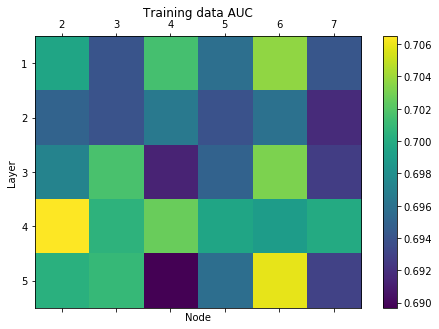

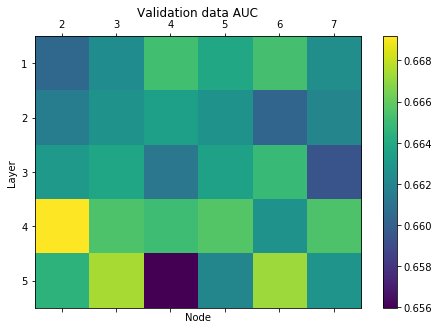

In [15]:
layers, nodes = range(1, 6), range(2, 8)
tr_auc = np.zeros((len(layers), len(nodes)))
va_auc = np.zeros((len(layers), len(nodes)))
for i, layer in enumerate(layers):
    for j, node in enumerate(nodes):
        nn = ml.nnet.nnetClassify()
        nn.init_weights([XtS.shape[1], 5, 2], 'random', XtS, Yt)
        nn.train(XtS, Yt, stopTol=1e-8, stepsize=.25, stopIter=300)
        tr_auc[i][j] = nn.auc(XtS, Yt)
        va_auc[i][j] = nn.auc(XvS, Yva)


f, ax = pt.subplots(1, 1, figsize=(8, 5))
cax = ax.matshow(tr_auc, interpolation='nearest')
f.colorbar(cax)
ax.set_xticklabels(['']+list(nodes))
ax.set_yticklabels(['']+list(layers))
pt.ylabel("Layer")
pt.xlabel("Node")
pt.title("Training data AUC")
pt.show()

f, ax = pt.subplots(1, 1, figsize=(8, 5))
cax = ax.matshow(va_auc, interpolation='nearest')
f.colorbar(cax)
ax.set_xticklabels(['']+list(nodes))
ax.set_yticklabels(['']+list(layers))
pt.ylabel("Layer")
pt.xlabel("Node")
pt.title("Validation data AUC")
pt.show()


 ## 6.2 Implement a custom activation function

In [16]:
def sig(x):
    return np.atleast_2d(np.exp(x**2/2))

def dsig(x):
    return np.atleast_2d(-x*np.exp(x**2/2))

nn = ml.nnet.nnetClassify()
nn.init_weights([XtS.shape[1], 5, 2], 'random', XtS, Yt)
nn.setActivation('custom', sig, dsig)
nn.train(XtS, Yt, stopTol=1e-8, stepsize=.25, stopIter=300)
print("Gaussian Training AUC: {}".format(nn.auc(XtS, Yt)))
print("Gaussian Validation AUC: {}".format(nn.auc(XvS, Yva)))


nn = ml.nnet.nnetClassify()
nn.init_weights([XtS.shape[1], 5, 2], 'random', XtS, Yt)
nn.setActivation('logistic')
nn.train(XtS, Yt, stopTol=1e-8, stepsize=.25, stopIter=300)
print("Logistic Training AUC: {}".format(nn.auc(XtS, Yt)))
print("Logistic Validation AUC: {}".format(nn.auc(XvS, Yva)))

nn = ml.nnet.nnetClassify()
nn.init_weights([XtS.shape[1], 5, 2], 'random', XtS, Yt)
nn.setActivation('htangent')
nn.train(XtS, Yt, stopTol=1e-8, stepsize=.25, stopIter=300)
print("HTangent Training AUC: {}".format(nn.auc(XtS, Yt)))
print("HTangent Validation AUC: {}".format(nn.auc(XvS, Yva)))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


it 1 : Jsur = nan, J01 = 0.3618
it 2 : Jsur = nan, J01 = 0.3618
it 4 : Jsur = nan, J01 = 0.3618
it 8 : Jsur = nan, J01 = 0.3618
it 16 : Jsur = nan, J01 = 0.3618
it 32 : Jsur = nan, J01 = 0.3618
it 64 : Jsur = nan, J01 = 0.3618
it 128 : Jsur = nan, J01 = 0.3618
it 256 : Jsur = nan, J01 = 0.3618
Gaussian Training AUC: 0.4864403218075159
Gaussian Validation AUC: 0.4976982014111342
it 1 : Jsur = 0.4294068329110018, J01 = 0.3306
it 2 : Jsur = 0.42845278346567595, J01 = 0.3324
it 4 : Jsur = 0.4280002609976649, J01 = 0.3334
it 8 : Jsur = 0.4276746793339877, J01 = 0.3314
it 16 : Jsur = 0.42762070190020096, J01 = 0.33
it 32 : Jsur = 0.4276826701052916, J01 = 0.3306
it 64 : Jsur = 0.4277852126577249, J01 = 0.331
it 128 : Jsur = 0.4279363665792282, J01 = 0.331
it 256 : Jsur = 0.4281157152087887, J01 = 0.3324
Logistic Training AUC: 0.6620277040231484
Logistic Validation AUC: 0.6441042042654319
it 1 : Jsur = 0.4254252553921908, J01 = 0.3272
it 2 : Jsur = 0.423323276879804, J01 = 0.3266
it 4 : Jsur 

 Gaussian Training AUC: 0.49458635778635773

 Gaussian Validation AUC: 0.496823807293988



 Logistic Training AUC: 0.649433462033462

 Logistic Validation AUC: 0.6483055317573599



 HTangent Training AUC: 0.6832237666237666

 HTangent Validation AUC: 0.6660746786034655

 For both Training and Validation AUC, htangent seems to be the best activation function.

 ## Statement of Collaboration
 I have not collaborated with anyone for this homework.